# Explore JEDI v2 spot checks

Objective: Look at some dimming data for 
1. cases that have been studied by hand in earlier papers
2. histograms of all parameters 
3. randomly selected events 

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly 
import plotly.plotly as py
import plotly.graph_objs as go
import cufflinks as cf

In [114]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
%matplotlib inline
sns.set()
plotly.tools.set_credentials_file(username='jmason86', api_key='wvT5wAI0l7q3uCvxT8ny')

In [165]:
filename = '/Users/jmason86/Dropbox/Research/Postdoc_NASA/Analysis/Coronal Dimming Analysis/JEDI Catalog/jedi_v2.h5'
jedi = pd.read_hdf(filename, key='jedi')
jedi.index = pd.DatetimeIndex(jedi['GOES Flare Peak Time'])

## 2010 August 7 event (from 2014 paper)

### 2010-08-07 depth

In [119]:
case1 = jedi['2010-08-07']

In [120]:
#case1.filter(regex="17.1 * Depth Max")
case1['17.1 Depth Max [%]']

GOES Flare Peak Time
2010-08-07 18:24:00   NaN
Name: 17.1 Depth Max [%], dtype: float64

Well that sucks. I hoped that it would automatically find a value here that I could compare with the 1.63% from the paper. 
What about the rest of the uncorrected lines? Can't slice with column names. Need to get the column index and slice out through the 39 emission lines.

In [134]:
jedi.columns.get_loc('9.4 Depth Max [%]')

400

In [135]:
case1[case1.columns[400:400+39]]

,9.4 Depth Max [%],13.1 Depth Max [%],13.3 Depth Max [%],17.1 Depth Max [%],17.7 Depth Max [%],18.0 Depth Max [%],19.5 Depth Max [%],20.2 Depth Max [%],21.1 Depth Max [%],25.6 Depth Max [%],28.4 Depth Max [%],30.4 Depth Max [%],33.5 Depth Max [%],36.1 Depth Max [%],36.8 Depth Max [%],44.6 Depth Max [%],46.5 Depth Max [%],49.9 Depth Max [%],52.1 Depth Max [%],52.6 Depth Max [%],53.7 Depth Max [%],55.4 Depth Max [%],56.8 Depth Max [%],58.4 Depth Max [%],59.2 Depth Max [%],60.0 Depth Max [%],61.0 Depth Max [%],62.5 Depth Max [%],63.0 Depth Max [%],71.9 Depth Max [%],72.2 Depth Max [%],77.0 Depth Max [%],79.0 Depth Max [%],83.6 Depth Max [%],95.0 Depth Max [%],97.3 Depth Max [%],97.7 Depth Max [%],102.6 Depth Max [%],103.2 Depth Max [%]
GOES Flare Peak Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-08-07 18:24:00,4.509083,7.974006,NaN,NaN,NaN,NaN,2.593467,NaN,NaN,0.498995,NaN,1.110902,15.081736,NaN,6.542261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


All the "dimming lines" from the paper are NaN here :( except the 19.5 depth showed up. It's 2.59% compared to the 1.52% found in the paper. And the first depth found (see below) is also 2.58%, so basically no different. Hmpf. 

In [123]:
jedi.columns.get_loc('9.4 Depth First [%]')

322

In [124]:
case1[case1.columns[322:322+39]]

,9.4 Depth First [%],13.1 Depth First [%],13.3 Depth First [%],17.1 Depth First [%],17.7 Depth First [%],18.0 Depth First [%],19.5 Depth First [%],20.2 Depth First [%],21.1 Depth First [%],25.6 Depth First [%],28.4 Depth First [%],30.4 Depth First [%],33.5 Depth First [%],36.1 Depth First [%],36.8 Depth First [%],44.6 Depth First [%],46.5 Depth First [%],49.9 Depth First [%],52.1 Depth First [%],52.6 Depth First [%],53.7 Depth First [%],55.4 Depth First [%],56.8 Depth First [%],58.4 Depth First [%],59.2 Depth First [%],60.0 Depth First [%],61.0 Depth First [%],62.5 Depth First [%],63.0 Depth First [%],71.9 Depth First [%],72.2 Depth First [%],77.0 Depth First [%],79.0 Depth First [%],83.6 Depth First [%],95.0 Depth First [%],97.3 Depth First [%],97.7 Depth First [%],102.6 Depth First [%],103.2 Depth First [%]
GOES Flare Peak Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-08-07 18:24:00,1.995414,5.648798,NaN,NaN,NaN,NaN,2.577505,NaN,NaN,0.260418,NaN,0.060381,0.939944,NaN,3.323307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


What about the corrected values? The paper looked at corrections by 28.4. 

In [125]:
case1.filter(regex="\d\d\.\d by 28.4 Depth Max \[\%\]")

,13.1 by 28.4 Depth Max [%],13.3 by 28.4 Depth Max [%],17.1 by 28.4 Depth Max [%],17.7 by 28.4 Depth Max [%],18.0 by 28.4 Depth Max [%],19.5 by 28.4 Depth Max [%],20.2 by 28.4 Depth Max [%],21.1 by 28.4 Depth Max [%],25.6 by 28.4 Depth Max [%],30.4 by 28.4 Depth Max [%],33.5 by 28.4 Depth Max [%],36.1 by 28.4 Depth Max [%],36.8 by 28.4 Depth Max [%],44.6 by 28.4 Depth Max [%],46.5 by 28.4 Depth Max [%],49.9 by 28.4 Depth Max [%],52.1 by 28.4 Depth Max [%],52.6 by 28.4 Depth Max [%],53.7 by 28.4 Depth Max [%],55.4 by 28.4 Depth Max [%],56.8 by 28.4 Depth Max [%],58.4 by 28.4 Depth Max [%],59.2 by 28.4 Depth Max [%],60.0 by 28.4 Depth Max [%],61.0 by 28.4 Depth Max [%],62.5 by 28.4 Depth Max [%],63.0 by 28.4 Depth Max [%],71.9 by 28.4 Depth Max [%],72.2 by 28.4 Depth Max [%],77.0 by 28.4 Depth Max [%],79.0 by 28.4 Depth Max [%],83.6 by 28.4 Depth Max [%],95.0 by 28.4 Depth Max [%],97.3 by 28.4 Depth Max [%],97.7 by 28.4 Depth Max [%],102.6 by 28.4 Depth Max [%],103.2 by 28.4 Depth Max [%]
GOES Flare Peak Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-08-07 18:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
case1.filter(regex="\d\d\.\d by 28.4 Depth First \[\%\]")

,13.1 by 28.4 Depth First [%],13.3 by 28.4 Depth First [%],17.1 by 28.4 Depth First [%],17.7 by 28.4 Depth First [%],18.0 by 28.4 Depth First [%],19.5 by 28.4 Depth First [%],20.2 by 28.4 Depth First [%],21.1 by 28.4 Depth First [%],25.6 by 28.4 Depth First [%],30.4 by 28.4 Depth First [%],33.5 by 28.4 Depth First [%],36.1 by 28.4 Depth First [%],36.8 by 28.4 Depth First [%],44.6 by 28.4 Depth First [%],46.5 by 28.4 Depth First [%],49.9 by 28.4 Depth First [%],52.1 by 28.4 Depth First [%],52.6 by 28.4 Depth First [%],53.7 by 28.4 Depth First [%],55.4 by 28.4 Depth First [%],56.8 by 28.4 Depth First [%],58.4 by 28.4 Depth First [%],59.2 by 28.4 Depth First [%],60.0 by 28.4 Depth First [%],61.0 by 28.4 Depth First [%],62.5 by 28.4 Depth First [%],63.0 by 28.4 Depth First [%],71.9 by 28.4 Depth First [%],72.2 by 28.4 Depth First [%],77.0 by 28.4 Depth First [%],79.0 by 28.4 Depth First [%],83.6 by 28.4 Depth First [%],95.0 by 28.4 Depth First [%],97.3 by 28.4 Depth First [%],97.7 by 28.4 Depth First [%],102.6 by 28.4 Depth First [%],103.2 by 28.4 Depth First [%]
GOES Flare Peak Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-08-07 18:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Well that sucks too. All NaN. I'd expect most of to be NaN since the initial depths were mostly NaN, but there was some hope that the 28.4 line was not NaN at the depth time once it was shifted in time for peak matching. Actually no... the light curves at the depth determination step have already been fitted, so are smooth curves without NaNs unless the whole thing is no good.

### 2010-08-07 event slope

In [127]:
case1['17.1 Slope Mean [%/s]']

GOES Flare Peak Time
2010-08-07 18:24:00   NaN
Name: 17.1 Slope Mean [%/s], dtype: float64

In [128]:
case1.filter(regex="\d\d\.\d Slope Mean \[\%/s\]")

,13.1 Slope Mean [%/s],13.3 Slope Mean [%/s],17.1 Slope Mean [%/s],17.7 Slope Mean [%/s],18.0 Slope Mean [%/s],19.5 Slope Mean [%/s],20.2 Slope Mean [%/s],21.1 Slope Mean [%/s],25.6 Slope Mean [%/s],28.4 Slope Mean [%/s],30.4 Slope Mean [%/s],33.5 Slope Mean [%/s],36.1 Slope Mean [%/s],36.8 Slope Mean [%/s],44.6 Slope Mean [%/s],46.5 Slope Mean [%/s],49.9 Slope Mean [%/s],52.1 Slope Mean [%/s],52.6 Slope Mean [%/s],53.7 Slope Mean [%/s],55.4 Slope Mean [%/s],56.8 Slope Mean [%/s],58.4 Slope Mean [%/s],59.2 Slope Mean [%/s],60.0 Slope Mean [%/s],61.0 Slope Mean [%/s],62.5 Slope Mean [%/s],63.0 Slope Mean [%/s],71.9 Slope Mean [%/s],72.2 Slope Mean [%/s],77.0 Slope Mean [%/s],79.0 Slope Mean [%/s],83.6 Slope Mean [%/s],95.0 Slope Mean [%/s],97.3 Slope Mean [%/s],97.7 Slope Mean [%/s],102.6 Slope Mean [%/s],103.2 Slope Mean [%/s],9.4 by 13.1 Slope Mean [%/s],9.4 by 13.3 Slope Mean [%/s],9.4 by 17.1 Slope Mean [%/s],9.4 by 17.7 Slope Mean [%/s],9.4 by 18.0 Slope Mean [%/s],9.4 by 19.5 Slope Mean [%/s],9.4 by 20.2 Slope Mean [%/s],9.4 by 21.1 Slope Mean [%/s],9.4 by 25.6 Slope Mean [%/s],9.4 by 28.4 Slope Mean [%/s],9.4 by 30.4 Slope Mean [%/s],9.4 by 33.5 Slope Mean [%/s],9.4 by 36.1 Slope Mean [%/s],9.4 by 36.8 Slope Mean [%/s],9.4 by 44.6 Slope Mean [%/s],9.4 by 46.5 Slope Mean [%/s],9.4 by 49.9 Slope Mean [%/s],9.4 by 52.1 Slope Mean [%/s],9.4 by 52.6 Slope Mean [%/s],9.4 by 53.7 Slope Mean [%/s],9.4 by 55.4 Slope Mean [%/s],9.4 by 56.8 Slope Mean [%/s],9.4 by 58.4 Slope Mean [%/s],9.4 by 59.2 Slope Mean [%/s],9.4 by 60.0 Slope Mean [%/s],9.4 by 61.0 Slope Mean [%/s],9.4 by 62.5 Slope Mean [%/s],9.4 by 63.0 Slope Mean [%/s],9.4 by 71.9 Slope Mean [%/s],9.4 by 72.2 Slope Mean [%/s],9.4 by 77.0 Slope Mean [%/s],9.4 by 79.0 Slope Mean [%/s],9.4 by 83.6 Slope Mean [%/s],9.4 by 95.0 Slope Mean [%/s],9.4 by 97.3 Slope Mean [%/s],9.4 by 97.7 Slope Mean [%/s],9.4 by 102.6 Slope Mean [%/s],9.4 by 103.2 Slope Mean [%/s],13.1 by 13.3 Slope Mean [%/s],13.1 by 17.1 Slope Mean [%/s],13.1 by 17.7 Slope Mean [%/s],13.1 by 18.0 Slope Mean [%/s],13.1 by 19.5 Slope Mean [%/s],13.1 by 20.2 Slope Mean [%/s],13.1 by 21.1 Slope Mean [%/s],13.1 by 25.6 Slope Mean [%/s],13.1 by 28.4 Slope Mean [%/s],13.1 by 30.4 Slope Mean [%/s],13.1 by 33.5 Slope Mean [%/s],13.1 by 36.1 Slope Mean [%/s],13.1 by 36.8 Slope Mean [%/s],13.1 by 44.6 Slope Mean [%/s],13.1 by 46.5 Slope Mean [%/s],13.1 by 49.9 Slope Mean [%/s],13.1 by 52.1 Slope Mean [%/s],13.1 by 52.6 Slope Mean [%/s],13.1 by 53.7 Slope Mean [%/s],13.1 by 55.4 Slope Mean [%/s],13.1 by 56.8 Slope Mean [%/s],13.1 by 58.4 Slope Mean [%/s],13.1 by 59.2 Slope Mean [%/s],13.1 by 60.0 Slope Mean [%/s],13.1 by 61.0 Slope Mean [%/s],13.1 by 62.5 Slope Mean [%/s],13.1 by 63.0 Slope Mean [%/s],13.1 by 71.9 Slope Mean [%/s],13.1 by 72.2 Slope Mean [%/s],13.1 by 77.0 Slope Mean [%/s],13.1 by 79.0 Slope Mean [%/s],13.1 by 83.6 Slope Mean [%/s],13.1 by 95.0 Slope Mean [%/s],13.1 by 97.3 Slope Mean [%/s],13.1 by 97.7 Slope Mean [%/s],13.1 by 102.6 Slope Mean [%/s],13.1 by 103.2 Slope Mean [%/s],13.3 by 13.1 Slope Mean [%/s],13.3 by 17.1 Slope Mean [%/s],13.3 by 17.7 Slope Mean [%/s],13.3 by 18.0 Slope Mean [%/s],13.3 by 19.5 Slope Mean [%/s],13.3 by 20.2 Slope Mean [%/s],13.3 by 21.1 Slope Mean [%/s],13.3 by 25.6 Slope Mean [%/s],13.3 by 28.4 Slope Mean [%/s],13.3 by 30.4 Slope Mean [%/s],13.3 by 33.5 Slope Mean [%/s],13.3 by 36.1 Slope Mean [%/s],13.3 by 36.8 Slope Mean [%/s],13.3 by 44.6 Slope Mean [%/s],13.3 by 46.5 Slope Mean [%/s],13.3 by 49.9 Slope Mean [%/s],13.3 by 52.1 Slope Mean [%/s],13.3 by 52.6 Slope Mean [%/s],13.3 by 53.7 Slope Mean [%/s],13.3 by 55.4 Slope Mean [%/s],13.3 by 56.8 Slope Mean [%/s],13.3 by 58.4 Slope Mean [%/s],13.3 by 59.2 Slope Mean [%/s],13.3 by 60.0 Slope Mean [%/s],13.3 by 61.0 Slope Mean [%/s],13.3 by 62.5 Slope Mean [%/s],13.3 by 63.0 Slope Mean [%/s],13.3 by 71.9 Slope Mean [%/s],13.3 by 72.2 Slope Mean [%/s],13.3 by 77.0 Slope Mean [%/s],13.3 by 79.0 Slope Mean [%/s],13.3 by 83.6 Sl

Pretty sparse. Comparing to the paper: 

Paper 19.5: 0.81 %/hr

JEDI  19.5: 2.75 %/hr

That's more than 3x different.

## 2016 paper of 2-2 week events

In [129]:
week1 = jedi['2011-02-10':'2011-02-25']
week2 = jedi['2011-08-01':'2011-08-14']
twotwo = pd.concat([week1, week2])

In [130]:
twotwo['17.1 Depth Max [%]'].dropna()

GOES Flare Peak Time
2011-02-17 21:35:00    1.094239
2011-02-18 21:04:00    5.811854
2011-02-19 03:03:00    6.317465
2011-02-19 08:04:00    3.493335
2011-02-19 16:43:00    3.992146
2011-02-19 21:13:00    3.587659
2011-02-24 19:38:00    2.034138
2011-02-25 05:44:00    1.552227
2011-08-01 22:13:00    1.281566
2011-08-02 06:19:00    3.137163
2011-08-02 09:27:00    5.692631
Name: 17.1 Depth Max [%], dtype: float64

None of these are super close matches to what's in Table 1 of the paper. That paper though doesn't say which line or line combo I'm using for the depth column. 

In [131]:
twotwo[twotwo.columns[400:400+39]].dropna(how='all')

,9.4 Depth Max [%],13.1 Depth Max [%],13.3 Depth Max [%],17.1 Depth Max [%],17.7 Depth Max [%],18.0 Depth Max [%],19.5 Depth Max [%],20.2 Depth Max [%],21.1 Depth Max [%],25.6 Depth Max [%],28.4 Depth Max [%],30.4 Depth Max [%],33.5 Depth Max [%],36.1 Depth Max [%],36.8 Depth Max [%],44.6 Depth Max [%],46.5 Depth Max [%],49.9 Depth Max [%],52.1 Depth Max [%],52.6 Depth Max [%],53.7 Depth Max [%],55.4 Depth Max [%],56.8 Depth Max [%],58.4 Depth Max [%],59.2 Depth Max [%],60.0 Depth Max [%],61.0 Depth Max [%],62.5 Depth Max [%],63.0 Depth Max [%],71.9 Depth Max [%],72.2 Depth Max [%],77.0 Depth Max [%],79.0 Depth Max [%],83.6 Depth Max [%],95.0 Depth Max [%],97.3 Depth Max [%],97.7 Depth Max [%],102.6 Depth Max [%],103.2 Depth Max [%]
GOES Flare Peak Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-02-10 06:58:00,0.647494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-10 13:52:00,2.558323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.532367,NaN,NaN,1.337864,NaN,NaN,NaN,NaN,NaN,2.720638,2.004317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.217665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-12 15:06:00,NaN,1.110281,NaN,NaN,NaN,NaN,NaN,NaN,2.409281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.732570,3.186935,NaN,NaN,NaN,NaN,2.708936,NaN,NaN,NaN,2.175332,2.375516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.505186,NaN
2011-02-13 07:29:00,NaN,NaN,NaN,NaN,0.216895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-13 17:38:00,NaN,NaN,NaN,NaN,3.655487,NaN,NaN,NaN,NaN,1.007116,NaN,NaN,NaN,NaN,NaN,NaN,1.841208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-14 04:49:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.568939,NaN,NaN,NaN,NaN,1.925506,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-02-14 08:49:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.281858,NaN,NaN
2011-02-14 17:26:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.125172,NaN,2.859243
2011-02-14 19:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.766704,NaN,0.867094,NaN,NaN,NaN,0.977573,0.869677,NaN,NaN,NaN,NaN,0.403348,0.950826,1.124809,NaN,NaN,2.476924,NaN,2.557511


In [132]:
twotwo[twotwo.columns[400:400+39]].dropna(how='all').describe()

,9.4 Depth Max [%],13.1 Depth Max [%],13.3 Depth Max [%],17.1 Depth Max [%],17.7 Depth Max [%],18.0 Depth Max [%],19.5 Depth Max [%],20.2 Depth Max [%],21.1 Depth Max [%],25.6 Depth Max [%],28.4 Depth Max [%],30.4 Depth Max [%],33.5 Depth Max [%],36.1 Depth Max [%],36.8 Depth Max [%],44.6 Depth Max [%],46.5 Depth Max [%],49.9 Depth Max [%],52.1 Depth Max [%],52.6 Depth Max [%],53.7 Depth Max [%],55.4 Depth Max [%],56.8 Depth Max [%],58.4 Depth Max [%],59.2 Depth Max [%],60.0 Depth Max [%],61.0 Depth Max [%],62.5 Depth Max [%],63.0 Depth Max [%],71.9 Depth Max [%],72.2 Depth Max [%],77.0 Depth Max [%],79.0 Depth Max [%],83.6 Depth Max [%],95.0 Depth Max [%],97.3 Depth Max [%],97.7 Depth Max [%],102.6 Depth Max [%],103.2 Depth Max [%]
count,25.000000,13.000000,0.0,11.000000,13.000000,8.000000,16.000000,13.000000,12.000000,23.000000,14.000000,26.000000,9.000000,0.0,4.000000,0.0,8.000000,16.000000,13.000000,3.000000,7.000000,7.000000,0.0,11.000000,0.0,3.000000,8.000000,9.000000,8.000000,0.0,0.0,3.000000,2.000000,4.000000,0.0,0.0,10.000000,7.000000,6.000000
mean,2.475385,2.124201,NaN,3.454038,2.760286,3.996287,2.989289,2.753476,2.784384,1.104513,3.310185,0.826427,4.451403,NaN,2.347608,NaN,2.153897,2.570145,2.892161,0.916362,1.219496,0.792853,NaN,1.683839,NaN,1.286969,1.968655,2.087295,1.223767,NaN,NaN,1.206341,0.898425,1.414171,NaN,NaN,2.175537,1.205301,2.683871
std,2.852223,1.548702,NaN,1.873512,1.810037,1.884474,2.421691,1.946540,2.431515,0.610970,3.539414,0.541493,4.070483,NaN,1.235626,NaN,1.307512,2.464824,2.673254,0.167351,0.842767,0.553410,NaN,1.173726,NaN,0.336334,2.154422,1.012432,0.556376,NaN,NaN,0.764534,0.074106,1.142957,NaN,NaN,0.796599,0.940244,1.118911
min,0.090353,0.584176,NaN,1.094239,0.180734,0.906907,0.554855,0.454878,0.805661,0.067856,0.424246,0.105607,0.967752,NaN,0.789122,NaN,0.518417,0.272048,0.155477,0.766704,0.283530,0.153749,NaN,0.356863,NaN,0.977573,0.185992,0.301382,0.668883,NaN,NaN,0.403348,0.846024,0.573053,NaN,NaN,0.974100,0.305758,0.821604
25%,1.204138,1.171057,NaN,1.793183,1.080057,2.305098,1.030777,1.201831,0.994837,0.784377,0.907439,0.429721,1.889475,NaN,1.822545,NaN,1.108306,1.149684,1.295572,0.826013,0.737008,0.427197,NaN,0.766817,NaN,1.107976,0.794492,2.175332,0.859760,NaN,NaN,0.846758,0.872224,0.791169,NaN,NaN,1.515163,0.440809,2.320972
50%,1.708052,1.532842,NaN,3.493335,3.655487,4.997044,1.983617,2.510870,1.851224,1.048475,2.463680,0.740900,2.147157,NaN,2.416713,NaN,2.112005,1.835691,2.337018,0.885321,0.913373,0.722628,NaN,1.447521,NaN,1.238379,1.013156,2.269190,1.058255,NaN,NaN,1.290169,0.898425,0.994342,NaN,NaN,2.313079,1.042084,2.708377
75%,2.836657,2.079631,NaN,4.842388,3.989260,5.249560,5.098008,4.523991,3.857773,1.440256,3.662359,1.154392,7.553798,NaN,2.941777,NaN,3.221029,2.860563,3.186935,0.991190,1.571734,1.050701,NaN,2.219989,NaN,1.441667,2.200606,2.627387,1.396965,NaN,NaN,1.607838,0.924626,1.617345,NaN,NaN,2.861530,1.851232,3.527720
max,14.703334,6.103199,NaN,6.317465,4.959227,5.938187,7.870971,5.593523,8.408902,2.628334,13.596979,2.565568,12.694341,NaN,3.767886,NaN,4.028235,9.811081,8.968976,1.097059,2.722088,1.717799,NaN,3.828507,NaN,1.644955,6.217665,3.230773,2.375516,NaN,NaN,1.925506,0.950826,3.094950,NaN,NaN,3.125172,2.505186,3.872194


Interesting that the 9.4 nm line shows regular dimming, though it's std is larger than the mean. Maybe I could apply a condition that the std be like half the mean or something to be considered valid. Some of the dimming lines would satisy such a condition. 

From the paper Table 1 depth column: 

$\mu$ = 2.06%

$\sigma$ = 1.35%

# Histograms

In [133]:
jedi[jedi.columns[400:400+39]].dropna(how='all').describe()

,9.4 Depth Max [%],13.1 Depth Max [%],13.3 Depth Max [%],17.1 Depth Max [%],17.7 Depth Max [%],18.0 Depth Max [%],19.5 Depth Max [%],20.2 Depth Max [%],21.1 Depth Max [%],25.6 Depth Max [%],28.4 Depth Max [%],30.4 Depth Max [%],33.5 Depth Max [%],36.1 Depth Max [%],36.8 Depth Max [%],44.6 Depth Max [%],46.5 Depth Max [%],49.9 Depth Max [%],52.1 Depth Max [%],52.6 Depth Max [%],53.7 Depth Max [%],55.4 Depth Max [%],56.8 Depth Max [%],58.4 Depth Max [%],59.2 Depth Max [%],60.0 Depth Max [%],61.0 Depth Max [%],62.5 Depth Max [%],63.0 Depth Max [%],71.9 Depth Max [%],72.2 Depth Max [%],77.0 Depth Max [%],79.0 Depth Max [%],83.6 Depth Max [%],95.0 Depth Max [%],97.3 Depth Max [%],97.7 Depth Max [%],102.6 Depth Max [%],103.2 Depth Max [%]
count,748.000000,555.000000,19.000000,402.000000,448.000000,408.000000,456.000000,466.000000,532.000000,615.000000,416.000000,897.000000,425.000000,0.0,64.000000,1.000000,165.000000,237.000000,237.000000,53.000000,158.000000,226.000000,53.000000,301.000000,4.000000,67.000000,194.000000,161.000000,222.000000,0.0,0.0,16.000000,12.000000,43.000000,0.0,9.000000,195.000000,89.000000,125.000000
mean,2.194225,2.284082,3.802239,2.059259,1.693159,1.732928,1.682530,1.663888,2.016199,1.511076,2.564801,1.008196,4.022364,NaN,4.255986,1.780743,1.932598,2.307142,3.274741,2.269856,2.221334,1.235281,3.951604,2.078600,3.380560,2.053185,3.077962,2.350365,1.504327,NaN,NaN,3.018988,3.280402,2.202003,NaN,3.436716,2.505202,2.678683,2.937454
std,2.450415,1.499736,7.068359,1.472554,1.322753,1.483928,1.567858,1.509401,2.301203,2.463664,2.765709,0.914328,5.892079,NaN,8.813690,NaN,1.322077,2.517897,4.351435,2.081690,2.045514,0.979228,5.484904,2.565135,2.955328,2.041883,2.472848,2.060190,1.033891,NaN,NaN,2.684960,2.242089,2.198111,NaN,1.291262,2.269916,2.381243,2.602230
min,0.058822,0.027851,0.619335,0.009734,0.122318,0.014549,0.104122,0.037348,0.068300,0.067856,0.000754,0.027962,0.076651,NaN,0.789122,1.780743,0.109200,0.076198,0.155477,0.290426,0.069205,0.033026,0.308088,0.038896,0.939027,0.060892,0.057486,0.092109,0.065932,NaN,NaN,0.343037,0.693281,0.342960,NaN,2.153988,0.043842,0.305758,0.276565
25%,0.962595,1.323494,1.171304,0.994310,0.752578,0.728884,0.714141,0.741648,0.865951,0.690468,1.013896,0.477824,1.433814,NaN,2.124129,1.780743,1.083972,1.073580,1.367847,0.885321,0.950853,0.613741,1.304737,0.772769,1.092069,0.917232,1.317137,0.998158,0.821659,NaN,NaN,1.315595,1.603077,1.177660,NaN,2.324516,1.118921,1.094841,1.337043
50%,1.476419,1.967428,1.749851,1.682178,1.306030,1.330942,1.254737,1.291053,1.307181,1.099508,1.626338,0.742887,2.714544,NaN,2.949226,1.780743,1.620750,1.694396,2.221334,1.369130,1.667353,0.966880,2.164460,1.284251,2.699458,1.450755,2.421785,2.099169,1.221929,NaN,NaN,2.165190,2.637140,1.765056,NaN,2.873100,1.961298,2.092537,2.198245
75%,2.558719,2.928803,2.386403,2.791681,2.234059,2.249376,2.084753,2.083154,2.253521,1.681542,3.084816,1.191615,4.763405,NaN,3.944390,1.780743,2.458008,2.818166,3.497718,2.635765,2.717173,1.550283,3.457281,2.409449,4.987949,2.281002,4.277940,2.978382,1.776703,NaN,NaN,3.374943,4.806817,2.243061,NaN,4.153263,3.129680,3.166771,3.750545
max,37.480093,12.037829,32.110005,11.913885,9.438813,12.327728,13.397210,15.569057,24.068277,45.153598,21.422920,10.440905,91.229151,NaN,72.597619,1.780743,8.592694,27.570878,47.590964,7.915060,14.579506,7.679801,30.684733,16.497660,7.184295,10.864660,13.011505,19.102411,6.450180,NaN,NaN,10.053540,7.805416,14.039964,NaN,5.793972,17.911693,14.606212,15.159317


In [137]:
temperature_sorted_lines = ['53.7', '95.0', '97.3', '102.6', '58.4', '71.9', '83.6', '30.4', '25.6', '97.7', '52.6', '60.0', '55.4', '79.0',
                            '63.0', '103.2', '13.1', '46.5', '17.1', '77.0', '17.7', '36.8', '62.5', '18.0', '61.0', '19.5', '20.2', '21.1',
                            '52.1', '49.9', '28.4', '33.5', '36.1', '44.6', '9.4', '59.2', '56.8', '72.2', '13.3']
temperature_sorted_line_depths = [s + ' Depth Max [%]' for s in temperature_sorted_lines]
log_temperatures = ['3.84', '3.84', '3.84', '3.84', '4.16', '4.48', '4.52', '4.70', '4.75', '4.84', '4.92', '4.92', '5.19', '5.19', '5.37',
                    '5.47', '5.57', '5.71', '5.81', '5.81', '5.99', '5.99', '6.05', '6.07', '6.1', '6.13', '6.19', '6.27', '6.28', '6.29',
                    '6.30', '6.43', '6.43', '6.44', '6.81', '6.89', '6.96', '6.96', '6.97']

plot_titles = [s + ' (' for s in log_temperatures]
plot_titles = [m + str(n) for m,n in zip(plot_titles, temperature_sorted_lines)]
plot_titles = [s + ' nm)' for s in plot_titles]

df = jedi[temperature_sorted_line_depths]

In [138]:
cf.set_config_file(offline=False, world_readable=True, theme='solar')

In [139]:
rows = 7
cols = 6
figure = df.iplot(kind='histogram', subplots=True, shape=(rows, cols), subplot_titles=plot_titles, legend=False, margin=(50, 10, 50, 70), 
                  title='Max Depth[%] Histograms Sorted by logT [K]', bargap=0, shared_xaxes=True, shared_yaxes=True, bins=(0, 10, 0.25), asFigure=True)
figure['layout']['yaxis'].update({'range': [0, 100]})
figure['layout']['xaxis'].update({'range': [0, 10]})
for i in range(1, rows+1):
    figure['layout']['yaxis' + str(i)].update({'range': [0, 100]})
for i in range(1, cols+1):
    figure['layout']['xaxis' + str(i)].update({'range': [0, 10]})
for i, trace in enumerate(figure['data']):
    trace['marker']['line'] = dict(color='#4C72B0')
    trace['marker']['color'] = '#4C72B0'
py.iplot(figure, filename='JEDI max depth histograms')

/Users/jmason86/anaconda/envs/jedi/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



Sorted those histograms by temperature so it's easier to see if the number of dimmings going down. Also to see the depth of dimming going down. Are those trends there?

In [140]:
peak_totals = [19, np.nan, np.nan, np.nan, 46, np.nan, np.nan, 222, 100, 21, np.nan, 11, 46, np.nan, 36, np.nan, 68, 20, 44, np.nan, 61, np.nan, 15, 60, 17, 61, 69, 88, 22, 35, 49, 36, np.nan, np.nan, 114, np.nan, np.nan, np.nan, np.nan]
temperatures = [float(t) for t in log_temperatures]

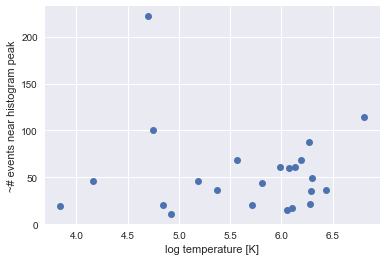

In [141]:
plt.plot(temperatures, peak_totals, 'o')
plt.xlabel('log temperature [K]')
plt.ylabel('~# events near histogram peak')
plt.savefig('histogram peaks vs temperature.png', bbox_inches='tight')

So maybe the first trend is there but it's not especially prominent. 

In [142]:
peak_depths = [0.88, np.nan, np.nan, np.nan, 0.88, np.nan, np.nan, 0.38, 0.63, 0.88, np.nan, 1.38, 0.63, np.nan, 1.13, np.nan, 1.88, 1.13, 1.38, np.nan, 0.63, np.nan, 0.88, 0.63, 0.88, 0.88, 1.13, 1.13, 1.13, 1.13, 1.13, 1.63, np.nan, np.nan, 0.88, np.nan, np.nan, np.nan, np.nan]

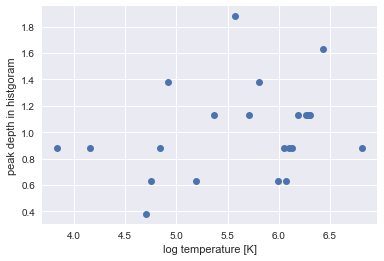

In [143]:
plt.plot(temperatures, peak_depths, 'o')
plt.xlabel('log temperature [K]')
plt.ylabel('peak depth in histgoram')
plt.savefig('peak depths vs temperature.png', bbox_inches='tight')

So the second trend doesn't really show up either, namely I don't see the largest peak depths in the 5.8-6.27 logT range. I'd expect that plot to look sort of like an inverted U, skewed to the right a little bit. Instead it basically looks like random scatter. 

In [151]:
jedi['17.1 by 28.4 Depth Max [%]'].dropna()

GOES Flare Peak Time
2010-10-18 16:43:00     5.752246
2011-04-13 10:41:00     2.687226
2011-09-21 16:49:00     4.538387
2012-02-19 08:51:00     2.710204
2012-06-26 19:44:00     2.457452
2012-06-27 05:27:00     3.860313
2012-06-28 02:14:00    50.773965
2012-07-11 22:27:00     3.148789
2012-11-19 02:28:00     1.478797
2013-01-15 12:10:00     5.127499
2013-05-21 07:48:00     3.356611
2013-06-26 16:01:00     1.396916
2013-10-07 05:08:00     2.848404
2014-03-28 23:51:00     2.403464
2014-04-04 21:51:00     2.022767
Name: 17.1 by 28.4 Depth Max [%], dtype: float64

In [149]:
'Of the len(jedi['17.1 by 28.4 Depth Max [%]'])

2839

In [164]:
jedi['Event #']

GOES Flare Peak Time
2010-05-04 16:29:00       1
2010-05-05 07:16:00       2
2010-05-05 11:52:00       3
2010-05-05 17:19:00       4
2010-05-07 07:42:00       5
2010-05-08 04:59:00       6
2010-05-08 11:50:00       7
2010-05-08 20:11:00       8
2010-06-12 00:57:00       9
2010-06-12 04:06:00      10
2010-06-12 09:17:00      11
2010-06-13 10:53:00      18
2010-06-14 00:51:00      19
2010-07-08 22:16:00      20
2010-07-09 09:01:00      21
2010-07-09 19:51:00      22
2010-07-13 10:51:00      23
2010-07-14 12:30:00      24
2010-07-14 20:47:00      25
2010-07-17 18:01:00      26
2010-07-20 13:45:00      27
2010-07-27 04:24:00      28
2010-07-28 20:42:00      29
2010-08-01 08:26:00      30
2010-08-05 21:35:00      31
2010-08-07 18:24:00      32
2010-08-14 10:05:00      33
2010-08-14 18:08:00      34
2010-08-15 18:30:00      35
2010-08-16 16:39:00      36
                       ... 
2014-04-05 10:50:00    5002
2014-04-05 18:27:00    5003
2014-04-06 18:30:00    5004
2014-04-06 21:01:00    5005

## How many things are dimming events? 

Try defining a dimming event as having a detected depth in both 17.1 and 19.5 nm lines. 

In [26]:
df2 = df[['17.1 Depth Max [%]', '19.5 Depth Max [%]']].dropna(how='any')

In [27]:
df2.head()

,17.1 Depth Max [%],19.5 Depth Max [%]
GOES Flare Peak Time,,
2010-06-13 10:53:00,2.233621,2.084706
2010-07-20 13:45:00,7.107572,5.415132
2010-08-14 18:08:00,2.009370,2.652916
2010-10-18 21:39:00,0.909666,1.520220
2010-11-04 02:53:00,2.716574,0.802429


In [28]:
df2.describe()

,17.1 Depth Max [%],19.5 Depth Max [%]
count,124.000000,124.000000
mean,2.098296,1.776587
std,1.349192,1.475134
min,0.135862,0.275905
25%,1.066087,0.799846
50%,1.790588,1.285575
75%,2.803137,2.189081
max,7.107572,7.870971


So out of the 5000 events, only 124 would classify as dimming detected with this criterion! Yikes, that's low. Only 2.5% of all potential events. That yield is disappointingly low. Though it is still 4x the number of events in our lasst paper. Still.. it's taken me much more than 4x the time to obtain these events automatically than it would've more manually and there's probably a lot of bad events in there.  

The mean values look reasonable though. And it's as expected: larger mean for 17.1 than 19.5. Larger standard deviations than I'd like. The minimum values are also lower than I'd like, at about the level of precision that we have with EVE. Max values also seem reasonable, and given that they are so close to each other, I'll bet that's from the same event. 

## Calculate how many big dimmings for Kevin ESCAPE -- how many expected dimmings in DEEP survey

In [182]:
type(jedi.columns.values.contains("hello"))

AttributeError: 'numpy.ndarray' object has no attribute 'contains'

In [184]:
df3 = jedi.filter(like='Depth Max [%]')

In [203]:
big_dimmings_df = df3[(df3 >= 5).any(axis=1)]

In [204]:
num_big_dimmings = float(len(big_dimmings_df))

In [193]:
num_any_dimmings = float(len(df3))

In [205]:
print('I have {0} events with a max dimming depth > 5%.\nI have {1} events where any level of dimming could be measured.\nThat is a rate of {2}%'.format(
    num_big_dimmings, num_any_dimmings, (num_big_dimmings / num_any_dimmings) * 100.))

I have 944.0 events with a max dimming depth > 5%.
I have 2839.0 events where any level of dimming could be measured.
That is a rate of 33.251144769284956%


In [210]:
jedi['Flare Interrupt'].value_counts()

True     2622
False     217
Name: Flare Interrupt, dtype: int64